In [1]:
import os
# import sys
import glob
# sys.path.insert(0, './')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib as mpl
import trackpy as tp
import pims as pm
from pims import pipeline
# from tqdm import tqdm_notebook
# from pylab import *

# from matplotlib.collections import PatchCollection
# from matplotlib.patches import Rectangle

# %matplotlib inline
idx = pd.IndexSlice


@pipeline
def as_gray(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

# Tracking

In this script, I will test the experimental conditions of day 01-02-2023 and 03-02-2023 to check if with 10xOil in the upper and lower part of the OP is a good configuration or instead I have to change the fild of view to obtain better images to analyze. 

In [2]:
directory = "/media/Carol/Magnetic/Experiments/Microfluidics_experiments/PDMS_chips/PreAnalyzed-videos_03-02-2023"

filenames = [file for file in glob.glob(
    os.path.join(directory,('*.avi')))]
filenames

['/media/Carol/Magnetic/Experiments/Microfluidics_experiments/PDMS_chips/PreAnalyzed-videos_03-02-2023/Result of 3uL-mim_cropped-1-b.avi',
 '/media/Carol/Magnetic/Experiments/Microfluidics_experiments/PDMS_chips/PreAnalyzed-videos_03-02-2023/Result of 1uL-min_cropped-b.avi',
 '/media/Carol/Magnetic/Experiments/Microfluidics_experiments/PDMS_chips/PreAnalyzed-videos_03-02-2023/Result of 2uL-min_1_cropped-1-b.avi',
 '/media/Carol/Magnetic/Experiments/Microfluidics_experiments/PDMS_chips/PreAnalyzed-videos_03-02-2023/Result of 2uL-min_cropped-b.avi',
 '/media/Carol/Magnetic/Experiments/Microfluidics_experiments/PDMS_chips/PreAnalyzed-videos_03-02-2023/Result of 1uL-min_0_cropped-b.avi',
 '/media/Carol/Magnetic/Experiments/Microfluidics_experiments/PDMS_chips/PreAnalyzed-videos_03-02-2023/Result of 2uL-min_0_cropped-1-b.avi',
 '/media/Carol/Magnetic/Experiments/Microfluidics_experiments/PDMS_chips/PreAnalyzed-videos_03-02-2023/Result of 2,5uL-min_cropped-1-b.avi',
 '/media/Carol/Magnetic/E

/media/Carol/Magnetic/Experiments/Microfluidics_experiments/PDMS_chips/PreAnalyzed-videos_03-02-2023/Result of 3uL-mim_cropped-1-b.avi


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


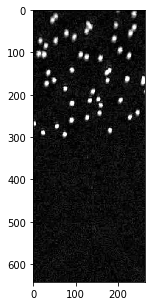

In [3]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

exp = 0
frame = 2000
print(filenames[exp])
fname = filenames[exp]
video = pm.open(fname)
ax.imshow(video[frame])

In [4]:
diameter = 10
radius = diameter/2
radius

diameter = 2*radius

i = 0    

@pipeline 
def locate(filename):

    return tp.locate(as_gray(filename),  2*round(radius)+1, minmass = 1000, topn = 100)

loc = locate(video[frame])

45

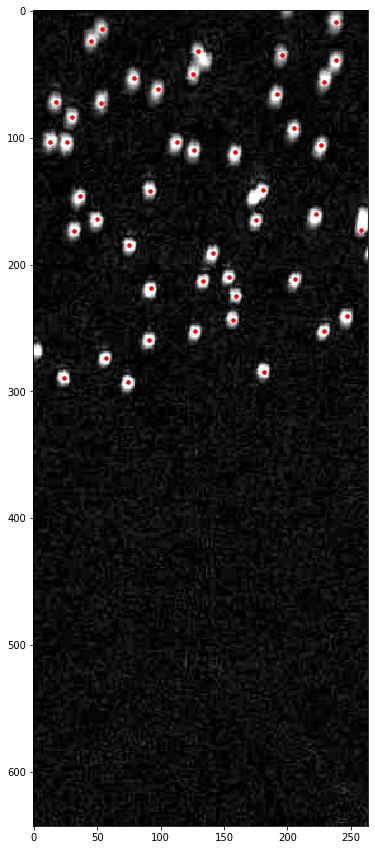

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(video[frame])
plt.plot(loc.x,loc.y,".",markersize=7, color="red")
len(loc.x)

In [6]:
%%time
@pipeline 
def locate_and_track(filename):
    try:
        video = pm.open(filename)
        print(video)
        location = tp.batch(as_gray(video[:]),2*round(radius)+1, minmass = 1000, topn = 100, processes = 1 )
        location
        location.to_csv(filename[:filename.find(".avi")]+"_location.dat", sep = "\t")
        tracking = tp.link(location, 20, memory = 10)
        tracking = tracking.set_index(["frame","particle"])
        tracking.to_csv(filename[:filename.find(".avi")]+"_tracking2.dat", sep="\t")
    except:
        return filename
    
failed = [locate_and_track(f) for f in filenames[:]]

Frame 3580: 23 trajectories present.
CPU times: user 5min 26s, sys: 11.1 s, total: 5min 37s
Wall time: 5min 30s


In [7]:
failed

[None, None, None, None, None, None, None, None]

In [16]:
def filter_enterieng_the_channel(trj, distance):
    """In this function, I will filter only the trajectories that enter the channel. 
    I will filter only the trajectories that explore a large value of y's."""
    
    c = ((trj.groupby('particle').y.max() - trj.groupby('particle').y.min())> distance).values
    cross = np.where(c) # index of particles that crossed the channel.
    n_traj = len(cross[0]) # number of trajectories that cross the channel
    crossing_particles = []
    
    for i in range(0,n_traj):

        crossing_particles.append(trj.query('particle == '+ str(cross[0][i])))

    df_crossing_part = pd.concat(crossing_particles)
        
    return df_crossing_part

(array([ 12,  54,  77,  95, 122, 179, 210, 219, 223, 243, 262, 298, 308,
       322, 329, 338, 345, 386]),)
18


Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


(array([24]),)
1


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


(array([ 15,  20,  23,  57, 116, 136, 138, 162, 170, 176, 206]),)
11


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


(array([10, 24, 28]),)
3


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


(array([ 1,  7,  9, 13, 21, 27, 43, 44, 54]),)
9


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


(array([16]),)
1


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


(array([ 3, 10]),)
2


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


(array([ 30,  72,  77,  88, 115, 130, 141, 159, 244, 252]),)
10


/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'


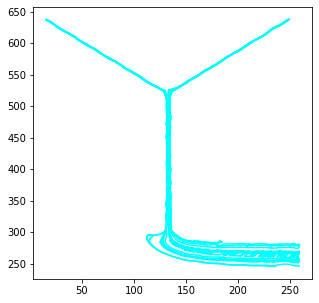

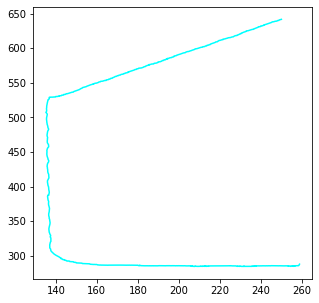

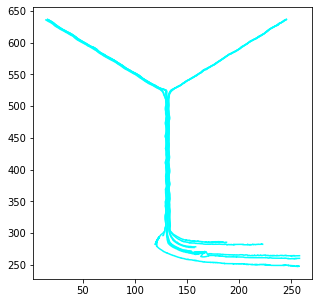

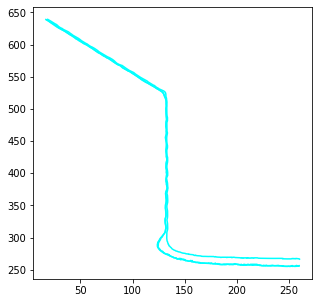

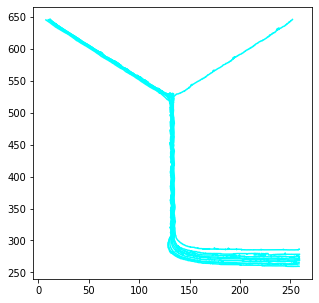

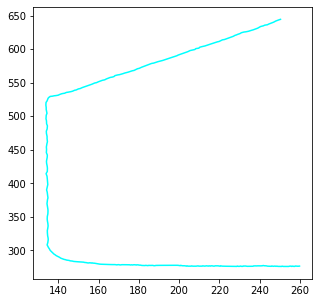

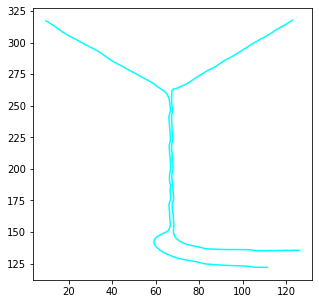

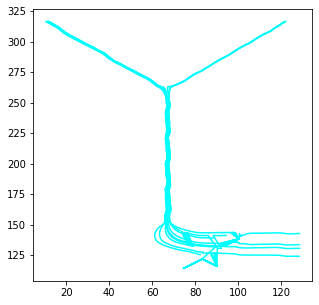

In [9]:
for file_no, filename in enumerate(filenames[0:]):
    
    fig, ax = plt.subplots(figsize = (5,5))

    trj = pd.read_csv(filename[:filename.find(".avi")]+"_tracking2.dat", index_col = [0,1], sep ="\t")
    trj = filter_enterieng_the_channel(trj, 100)
    trj.to_csv(filename[:filename.find(".avi")]+"_trj.dat",sep = "\t")
    video = pm.open(filename)

    for p,trj_p in trj.groupby("particle"):
           plt.plot(trj_p.x, trj_p.y, color="cyan")


Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderTimed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
/home/carolina/anaconda3/lib/python3.7/site-packages/pims/api.py:207: UserWarning: <class 'pims.pyav_reader.PyAVReaderIndexed'> errored: 'NoneType' object has no attribute 'open'
  warn(message)
Exception ignored in: <function PyAVReaderIndexed.__del__ at 0x7f329e581cb0>
Traceback (most recent call last):
  File "/home/carolina/anaconda3/lib/python3.7/site-packages/pims/pyav_reader.py", line 368, in __del__
    self._container.close()
AttributeError: 'NoneType' object has no attribute 'close'
/home/

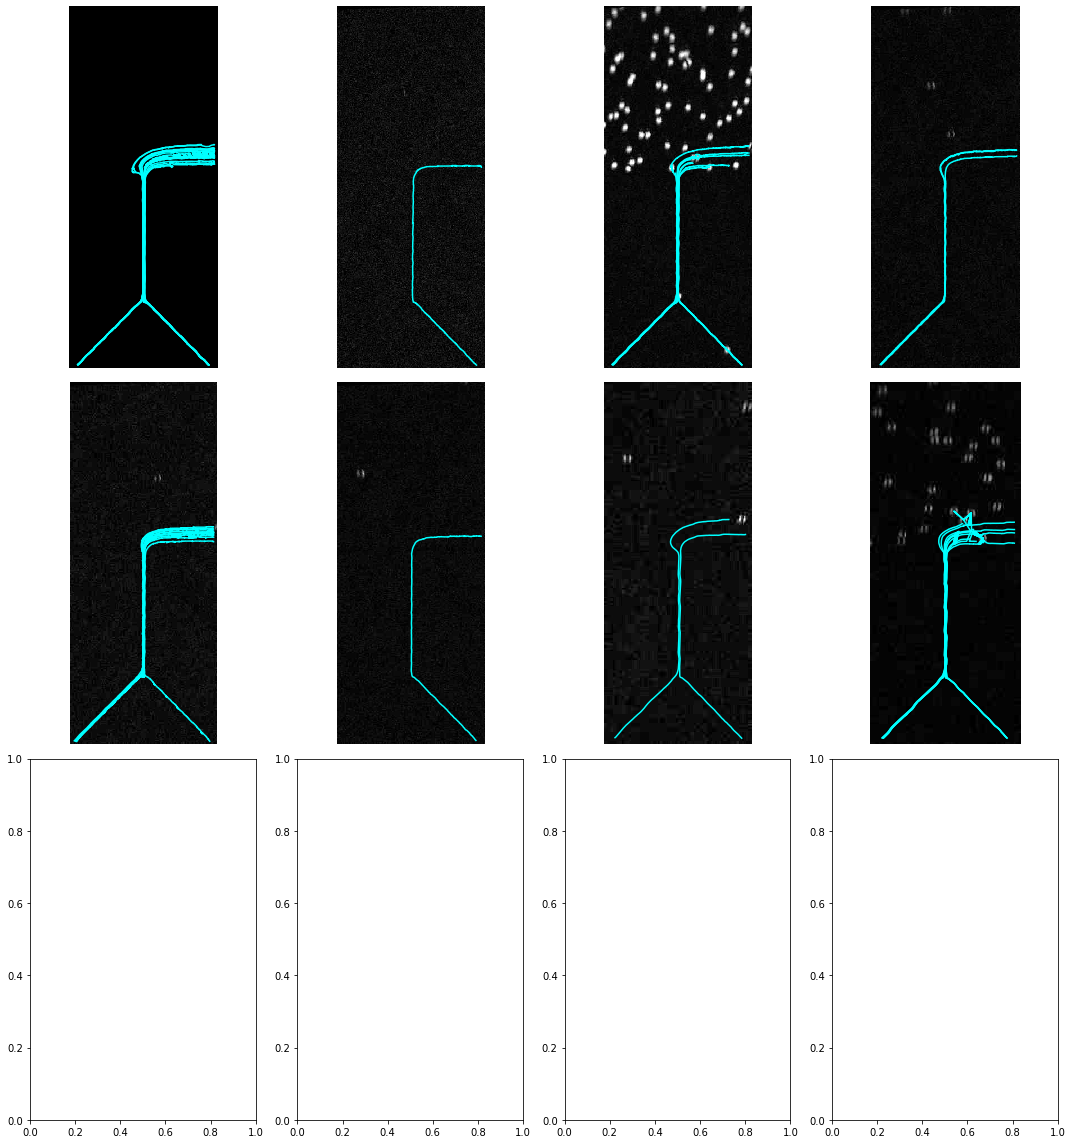

In [18]:

fig, ax = plt.subplots(3,4,figsize=(15,16))

ax = np.delete(ax.flatten(),slice(-3,None,2))

for file_no, filename in enumerate(filenames[0:]):

    trj = pd.read_csv(filename[:filename.find(".avi")]+"_tracking2.dat", index_col = [0,1], sep ="\t")
    trj = filter_enterieng_the_channel(trj, 100)
    trj.to_csv(filename[:filename.find(".avi")]+"_trj.dat",sep = "\t")
    
    video = pm.open(filename)

    ax.flatten()[file_no].imshow(video[file_no])
    ax.flatten()[file_no].set_axis_off()

    for p,trj_p in trj.groupby("particle"):
       ax.flatten()[file_no].plot(trj_p.x, trj_p.y, color="cyan")
        
plt.tight_layout()